<a href="https://colab.research.google.com/github/lovnishverma/Python-Getting-Started/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
👥 Total Passengers: 891
✅ Total Survivors: 342
📊 Survival Rate: 38.4%

👨 Male Stats:
 - Total Males: 577
 - Survived: 109
 - Survival Rate: 18.9%

👩 Female Stats:
 - Total Females: 314
 - Survived: 233
 - Survival Rate: 74.2%

📊 Visual Survival Bars:
Overall:  🟩🟩🟩🟩⬜⬜⬜⬜⬜⬜ 38.4%
Males:    🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜ 18.9%
Females:  🟩🟩🟩🟩🟩🟩🟩⬜⬜⬜ 74.2%


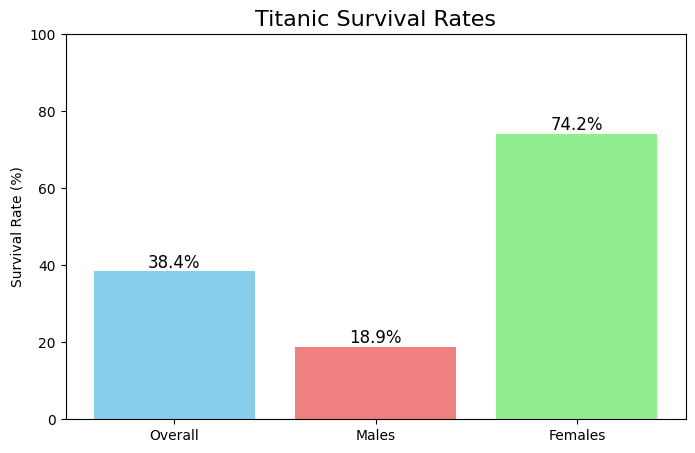


👶 Age Group Survival Rates:
 - Children: 🟩🟩🟩🟩🟩🟩⬜⬜⬜⬜ 58.0%
 - Teens: 🟩🟩🟩🟩⬜⬜⬜⬜⬜⬜ 41.1%
 - Adults: 🟩🟩🟩🟩⬜⬜⬜⬜⬜⬜ 36.5%
 - Seniors: 🟩🟩🟩⬜⬜⬜⬜⬜⬜⬜ 26.9%

Passenger Class Survival Rates:
 - Class 1: 🟩🟩🟩🟩🟩🟩⬜⬜⬜⬜ 63.0%
 - Class 2: 🟩🟩🟩🟩🟩⬜⬜⬜⬜⬜ 47.3%
 - Class 3: 🟩🟩⬜⬜⬜⬜⬜⬜⬜⬜ 24.2%


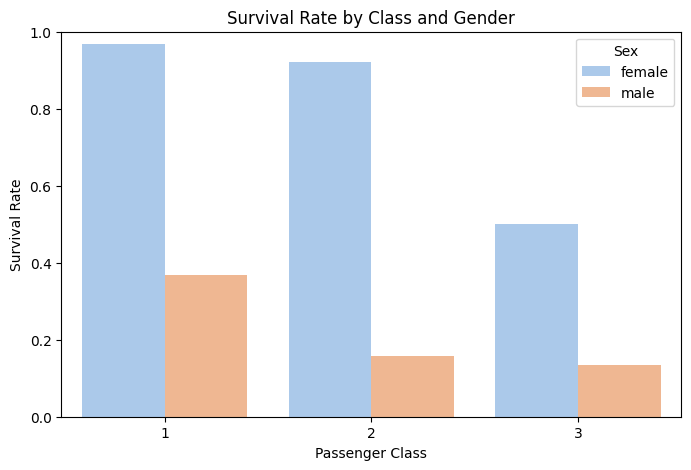

In [53]:
# 🛳️ Titanic Survival Analysis

# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🌐 Step 2: Load Titanic Dataset
url = "https://raw.githubusercontent.com/lovnishverma/datasets/refs/heads/main/titanic.csv"
df = pd.read_csv(url)
# print(df.head())
# print(df.info())
# print(df.describe())
print(df.isnull().sum())

# 🧼 Clean Data (Fix missing age)
df["Age"] = df["Age"].fillna(df["Age"].median())

# 👥 Step 3: Total Passengers
total_passengers = len(df)
print(f"👥 Total Passengers: {total_passengers}")

# ✅ Step 4: Total Survivors
total_survivors = df[df["Survived"] == 1].shape[0]
print(f"✅ Total Survivors: {total_survivors}")

# 📊 Step 5: Overall Survival Rate
survival_rate = round((total_survivors / total_passengers) * 100, 1)
print(f"📊 Survival Rate: {survival_rate}%")

# 👨 Step 6: Male Stats
males = df[df["Sex"] == "male"]
total_males = len(males)
survived_males = males[males["Survived"] == 1].shape[0]
male_survival_rate = round((survived_males / total_males) * 100, 1)

print("\n👨 Male Stats:")
print(f" - Total Males: {total_males}")
print(f" - Survived: {survived_males}")
print(f" - Survival Rate: {male_survival_rate}%")

# 👩 Step 7: Female Stats
females = df[df["Sex"] == "female"]
total_females = len(females)
survived_females = females[females["Survived"] == 1].shape[0]
female_survival_rate = round((survived_females / total_females) * 100, 1)

print("\n👩 Female Stats:")
print(f" - Total Females: {total_females}")
print(f" - Survived: {survived_females}")
print(f" - Survival Rate: {female_survival_rate}%")

# 🎨 Step 8: Emoji Bar Function
def emoji_bar(rate, emoji="🟩", total=10):
    filled = round(rate / 10)
    return emoji * filled + "⬜" * (total - filled)

# 📊 Step 9: Visual Bar Summary
print("\n📊 Visual Survival Bars:")
print(f"Overall:  {emoji_bar(survival_rate)} {survival_rate}%")
print(f"Males:    {emoji_bar(male_survival_rate)} {male_survival_rate}%")
print(f"Females:  {emoji_bar(female_survival_rate)} {female_survival_rate}%")

# 📈 Step 10: Bar Chart
labels = ["Overall", "Males", "Females"]
rates = [survival_rate, male_survival_rate, female_survival_rate]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, rates, color=["skyblue", "lightcoral", "lightgreen"])
plt.ylim(0, 100)
plt.title("Titanic Survival Rates", fontsize=16)
plt.ylabel("Survival Rate (%)")

# Add text labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}%', ha='center', fontsize=12)

plt.show()

# 👶 Age Group Analysis
def get_age_group(age):
    if age < 13:
        return "Children"
    elif age < 20:
        return "Teens"
    elif age < 60:
        return "Adults"
    else:
        return "Seniors"

df["AgeGroup"] = df["Age"].apply(get_age_group)
age_group_rates = df.groupby("AgeGroup")["Survived"].mean().sort_values(ascending=False) * 100

print("\n👶 Age Group Survival Rates:")
for group, rate in age_group_rates.items():
    print(f" - {group}: {emoji_bar(rate)} {round(rate, 1)}%")

# 💺 Class Survival Rates
class_rates = df.groupby("Pclass")["Survived"].mean() * 100

print("\nPassenger Class Survival Rates:")
for pclass, rate in class_rates.items():
    print(f" - Class {pclass}: {emoji_bar(rate)} {round(rate, 1)}%")

# 🖼️ Bonus Plot - Class vs Survival by Sex
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', errorbar=None, palette='pastel')
plt.title("Survival Rate by Class and Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.ylim(0, 1)
plt.show()


In [54]:
# 🔁 Continue from previous analysis...

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🧹 Step 1: Data Preprocessing

# Encode 'Sex' and 'Embarked' columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].fillna('S')

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Optional: Drop non-numeric or irrelevant columns
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# ✨ Step 2: Define Features & Target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# 🧪 Step 3: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🤖 Step 4: Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 📈 Step 5: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {round(accuracy * 100, 2)}%")

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 🔍 Step 6: Predict on Sample Input
sample_passenger = pd.DataFrame({
    'Pclass': [3],
    'Sex': [1],  # 0 = male, 1 = female
    'Age': [45],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked_Q': [0],
    'Embarked_S': [1]
})

prediction = model.predict(sample_passenger)[0]
print("\n🔮 Sample Prediction:")
print(" - Survived" if prediction == 1 else " - Did Not Survive")



🎯 Accuracy: 81.01%

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

🧮 Confusion Matrix:
[[90 15]
 [19 55]]

🔮 Sample Prediction:
 - Did Not Survive
